In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("/content/drive/MyDrive/University/University's Assignment/Capstone Design Class/Code/Data/911.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#Basic Questions

What are the top 5 zip for 911 calls

In [17]:
df['zip'].value_counts().head(5)

,count
zip,
19401.0,45606
19464.0,43910
19403.0,34888
19446.0,32270
19406.0,22464


What are the top 5 town (twp) for 911 calls

In [18]:
df['twp'].value_counts().head(5)

,count
twp,
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


#Data Cleaning - Creating new features

In [19]:
#Split Departments with the Reasons in title column

df['Departments'] = df['title'].apply(lambda title : title.split(':')[0])
df['Departments'].head()

,Departments
0,EMS
1,EMS
2,Fire
3,EMS
4,EMS


What is the most common Reason for a 911 call based off of the department?

In [20]:
df['Departments'].value_counts()

,count
Departments,
EMS,332692
Traffic,230208
Fire,100622


<ipython-input-21-ba924a7618bf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Departments', data = df, palette = 'viridis')


<Axes: xlabel='Departments', ylabel='count'>

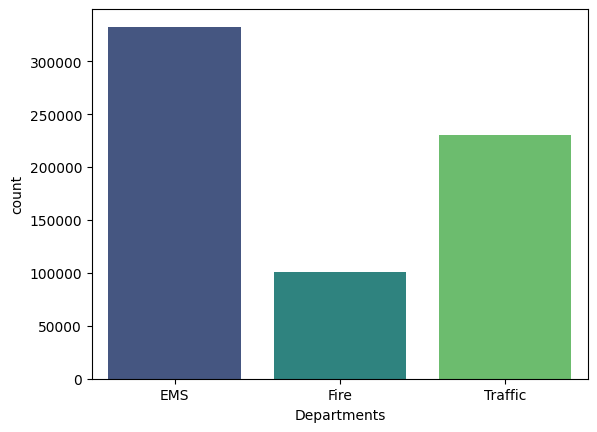

In [21]:
sns.countplot(x='Departments', data = df, palette = 'viridis')

In [22]:
type(df['timeStamp'].iloc[0])

str

In [23]:
#Changing the timeStamps to DateTime

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [24]:
#Making New Column called Hours / Month / Day of Week

time = df['timeStamp']

df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['Month'] = df['timeStamp'].apply(lambda time : time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time : time.dayofweek)

In [25]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Departments,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [26]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

df['Day of Week'] = df['Day of Week'].map(dmap)

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Departments,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


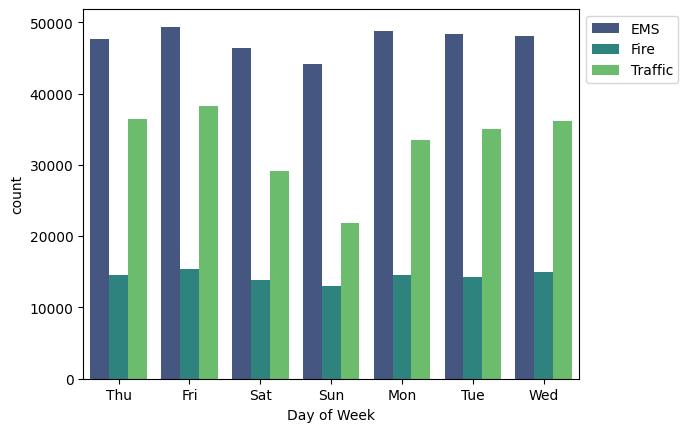

In [28]:
sns.countplot(x='Day of Week', data=df, hue='Departments', palette = 'viridis')
plt.legend(bbox_to_anchor = (1, 1))

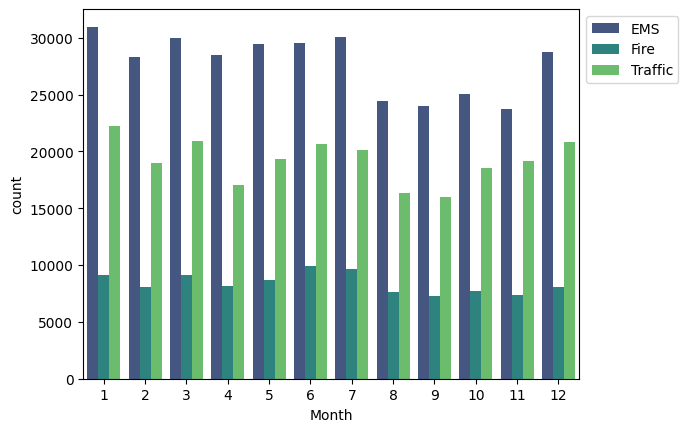

In [29]:
sns.countplot(x='Month', data=df, hue='Departments', palette = 'viridis')
plt.legend(bbox_to_anchor = (1, 1))

In [30]:
bymonth = df.groupby('Month').count()

In [31]:
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Departments,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


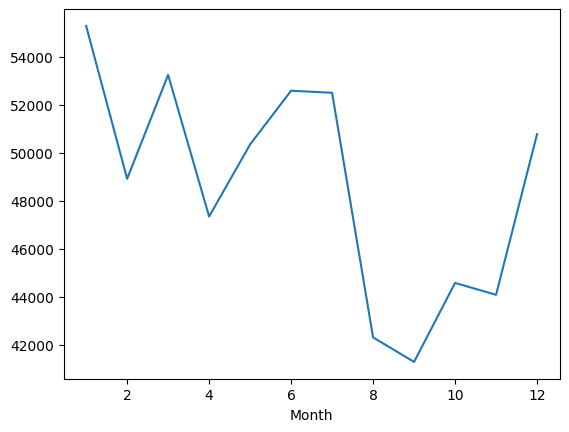

In [32]:
bymonth['zip'].plot()
plt.show()

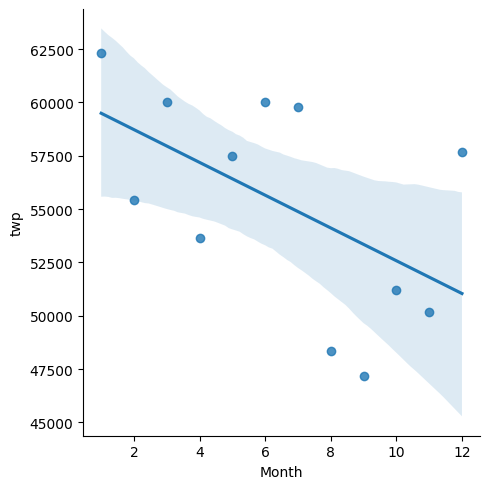

In [33]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())

In [34]:
df['Date'] = df['timeStamp'].apply(lambda time : time.date())

In [35]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Departments,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


Text(0.5, 1.0, 'Traffic')

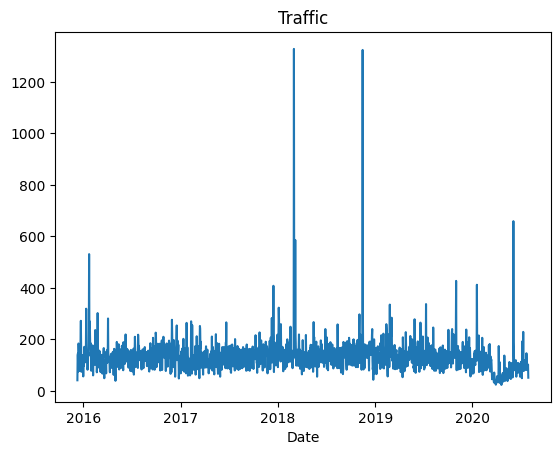

In [36]:
df[df['Departments']=='Traffic'].groupby('Date').count()['Month'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'EMS')

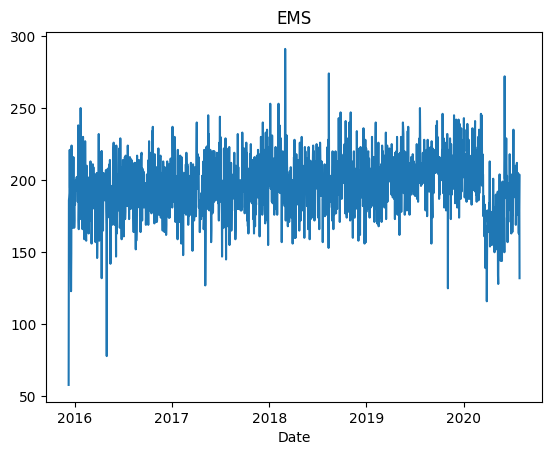

In [37]:
df[df['Departments']=='EMS'].groupby('Date').count()['Month'].plot()
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

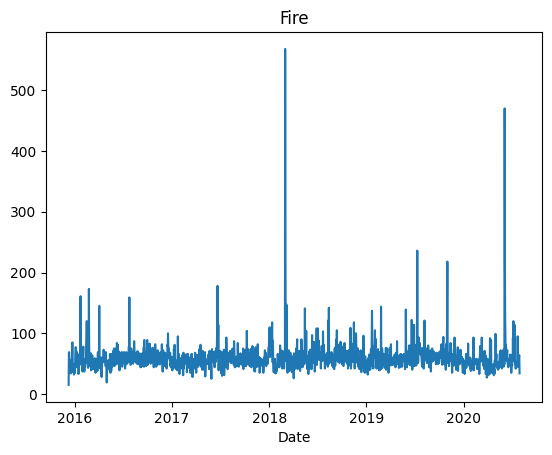

In [38]:
df[df['Departments']=='Fire'].groupby('Date').count()['Month'].plot()
plt.title('Fire')

#Heatmap

In [39]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Departments'].unstack()

<Axes: xlabel='Hour', ylabel='Day of Week'>

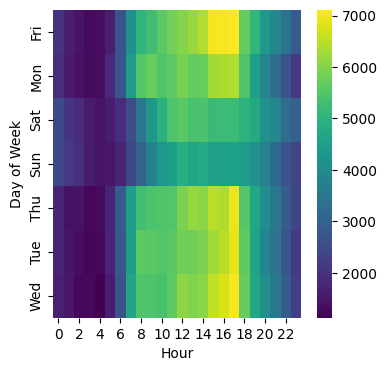

In [40]:
plt.figure(figsize=(4,4))
sns.heatmap(dayHour, cmap = 'viridis')

<Figure size 400x400 with 0 Axes>

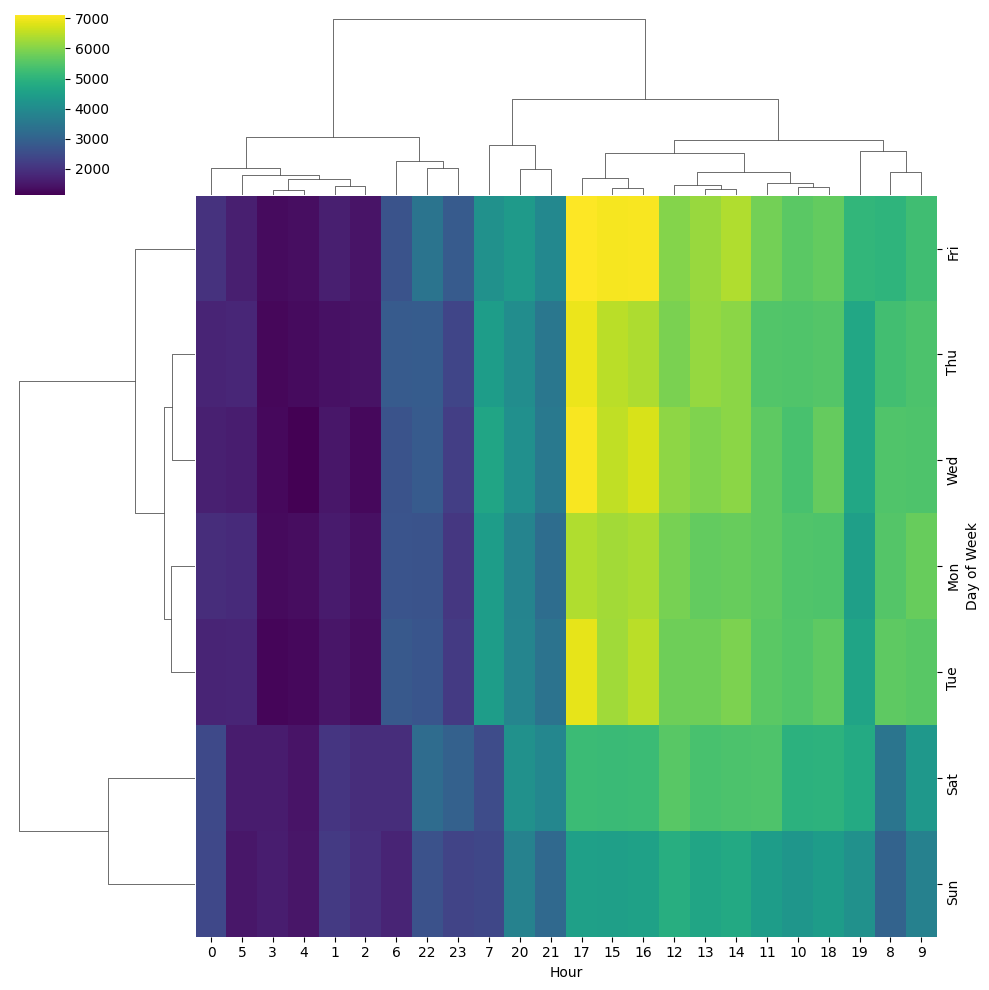

In [41]:
plt.figure(figsize=(4,4))
sns.clustermap(dayHour, cmap='viridis')

In [42]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Departments'].unstack()

<Axes: xlabel='Month', ylabel='Day of Week'>

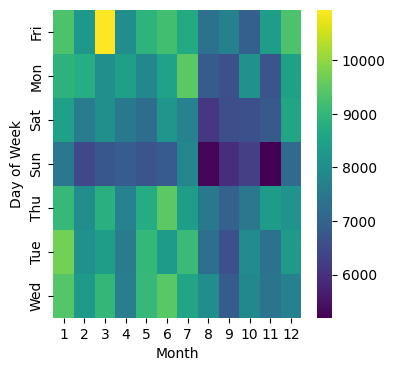

In [43]:
plt.figure(figsize=(4,4))
sns.heatmap(dayMonth, cmap='viridis')

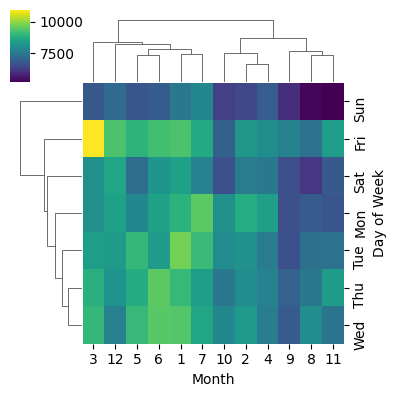

In [44]:
sns.clustermap(dayMonth, cmap='viridis', figsize=(4,4))